# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset
dataset=pd.read_csv(r'D:\sumit_DS project\Datasets with source_code\ML\positon_salaries\Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
#now lets see what index we need to check, so when we look at the table hear we want to predict the salary  based on different level and then we predict salary of 6.5 level 
#we dont need the categorical column becuase that column is equivalent to level only
#we encoded the positio level associated with each position level 
#so we need 2 columns to build the ML model & machine will learn the corelation b/w position and salary to predict if the employee is bluffing about salary
#so we dont need the categorical data & we consider only 2 columns
#so our X-matrix is only one column is level and y-matrix is salary
#this dataset contains 3 columns - position , level & salary
#if you take indexing from column wise then postion would be 0 index - position,1st index is lvele & 2nd index one is salary indexing


X = dataset.iloc[:, 1:2].values
print(X)
#now we will create X matrix of feature and we will spcify the index 1 - LEVEL & however there is something
#then i have to mention 2 because in python upper bound of range is excluded
y = dataset.iloc[:, 2].values
print(y)
#Dependent variable we will specify the index 2


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#To compare both linear model created lin_reg & for polynomial we will mention as lin_reg2
#so create a object of lin_reg and called the class LinearRegression

In [5]:
lin_reg.fit(X, y)
#fit the lin_reg object to X & y. now our simple linear regression is ready 

#now our simple linear regression is ready 

LinearRegression()

In [6]:
#to create this model we will import a PolynomialFeature
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
#preprocessing is library we used for feature scaling in data preprocessing
#from preprocessing library we called the class as PolynomialFeatures class

In [7]:
poly_reg=PolynomialFeatures(degree=5)
#create an object called poly_reg & we will assigned the degree 
#what exactly poly_reg will do the transform the feature of X & y to new matrix called X_poly & y_poly
#polyfeature will transfer from X1 to X1square, X2 to X2 square 
#it will transferm untill you mention the power
#in one independent variable X  till 2,3,4 or 5 columns will be crreated based on the power
#to the first step i will mention the default degree is 2 

In [8]:
X_poly=poly_reg.fit_transform(X)
#finaly we will create new X_poy object or X_poly matrix to hold newly created columns by polyfeatures
#poly_reg is the object to fit and transform from X to X_poly matrix
#we are transform from X independent to poly by adding degree 2

In [9]:
#Lets see the variable explore what happend hear first upol click on X you get the orighinal level & in X_poly matrix we have 3 columns
#in the X_poly where is our X which is our second column & if you see 2nd then you get the degree of square
#remember in multiple linear regression we have to add manualy of column 1 called constant 
#when you called Poly_reg_transform automatically or bydefault 1 will be created

poly_reg.fit(X_poly, y)
#now we have to fit the poly_reg fit instad of x we have to fit with X_poly, y
#in linear we have done lin_reg.fit (x,y)

PolynomialFeatures(degree=5)

In [10]:
lin_reg_2 = LinearRegression()
#we crate an 2nd object for same LinearRegression
lin_reg_2.fit(X_poly, y)
#now we need to fit lineare regression object to X_poly & y
#now our polynomial model is created & we will ready to review the truth or bluff part
#now we build 2 regressor - linear regressor and polynomial regressor

LinearRegression()

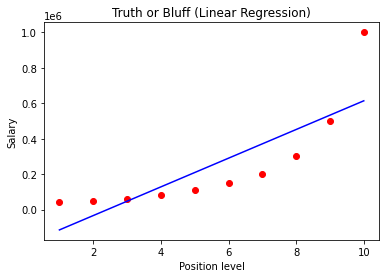

In [11]:
#now we gonna visualize all the result & we will start all the observation point on x-asix and we will 10 related salary on y-axis
#first we will draw the visualtin of linear regression model and then we will build the visualize of polynomial regression model
#we will compare the true value of true observaiton made by the model

# Visualising the Linear Regression results

#lets starts the plotting by true observation 
plt.scatter(X, y, color = 'red')
#we are going to plot for actual value of X & y
plt.plot(X, lin_reg.predict(X), color = 'blue')
#now plot for the prediction line where x coordinate are predictin points & for y-cordinates predicted value which is lin_reg.predict (x)
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


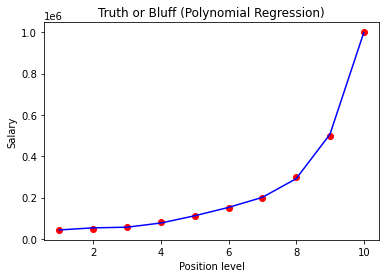

In [12]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
#in y-coordinate we have to replace with lin_reg2 which we create for poly regression model
#X_poly is not defined cuz we already defined in above plot, so insted of X_poly we will define complete fit_trasnform code 
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [13]:
# Predicting a new result with Linear Regression
   
#means that show me the predicted salary coresponding to 6.5 & lets see what our linear regression model is predict 
#if you go back to linear plot 6.5 level we got as 331k somewher around & this is linear regression result and this is not the definitely not the best one for prediction


array([330378.78787879])

In [14]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
#This code show me that predicted salary of 6.5 level using poly reg model
#That means employee is True and we solved this by using polyregression model


array([174878.07765172])

## Insight:
1.Linear Regression predicts 331k salary for 6.5 years which is no way near the ooptimum value, hence we can say bad model.

2.Polynomial Regression with degree 5 predicts 175k salary at 6.5 years which is somewhat close, hence good model.
